In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
target = iris.target  # Class labels (0, 1, 2)
target_names = iris.target_names

In [3]:
print("Basic Statistics for Each Feature:")
for i, feature in enumerate(feature_names):
    feature_data = data[:, i]
    mean = np.mean(feature_data)
    median = np.median(feature_data)
    std_dev = np.std(feature_data)
    variance = np.var(feature_data)
    min_val = np.min(feature_data)
    max_val = np.max(feature_data)
    quantiles = np.percentile(feature_data, [25, 50, 75])

    print(f"\nFeature: {feature}")
    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Standard Deviation: {std_dev}")
    print(f"  Variance: {variance}")
    print(f"  Min: {min_val}, Max: {max_val}")
    print(f"  25th, 50th (Median), 75th Quantiles: {quantiles}")

Basic Statistics for Each Feature:

Feature: sepal length (cm)
  Mean: 5.843333333333334
  Median: 5.8
  Standard Deviation: 0.8253012917851409
  Variance: 0.6811222222222223
  Min: 4.3, Max: 7.9
  25th, 50th (Median), 75th Quantiles: [5.1 5.8 6.4]

Feature: sepal width (cm)
  Mean: 3.0573333333333337
  Median: 3.0
  Standard Deviation: 0.4344109677354946
  Variance: 0.1887128888888889
  Min: 2.0, Max: 4.4
  25th, 50th (Median), 75th Quantiles: [2.8 3.  3.3]

Feature: petal length (cm)
  Mean: 3.7580000000000005
  Median: 4.35
  Standard Deviation: 1.759404065775303
  Variance: 3.0955026666666665
  Min: 1.0, Max: 6.9
  25th, 50th (Median), 75th Quantiles: [1.6  4.35 5.1 ]

Feature: petal width (cm)
  Mean: 1.1993333333333336
  Median: 1.3
  Standard Deviation: 0.7596926279021594
  Variance: 0.5771328888888888
  Min: 0.1, Max: 2.5
  25th, 50th (Median), 75th Quantiles: [0.3 1.3 1.8]


In [4]:
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

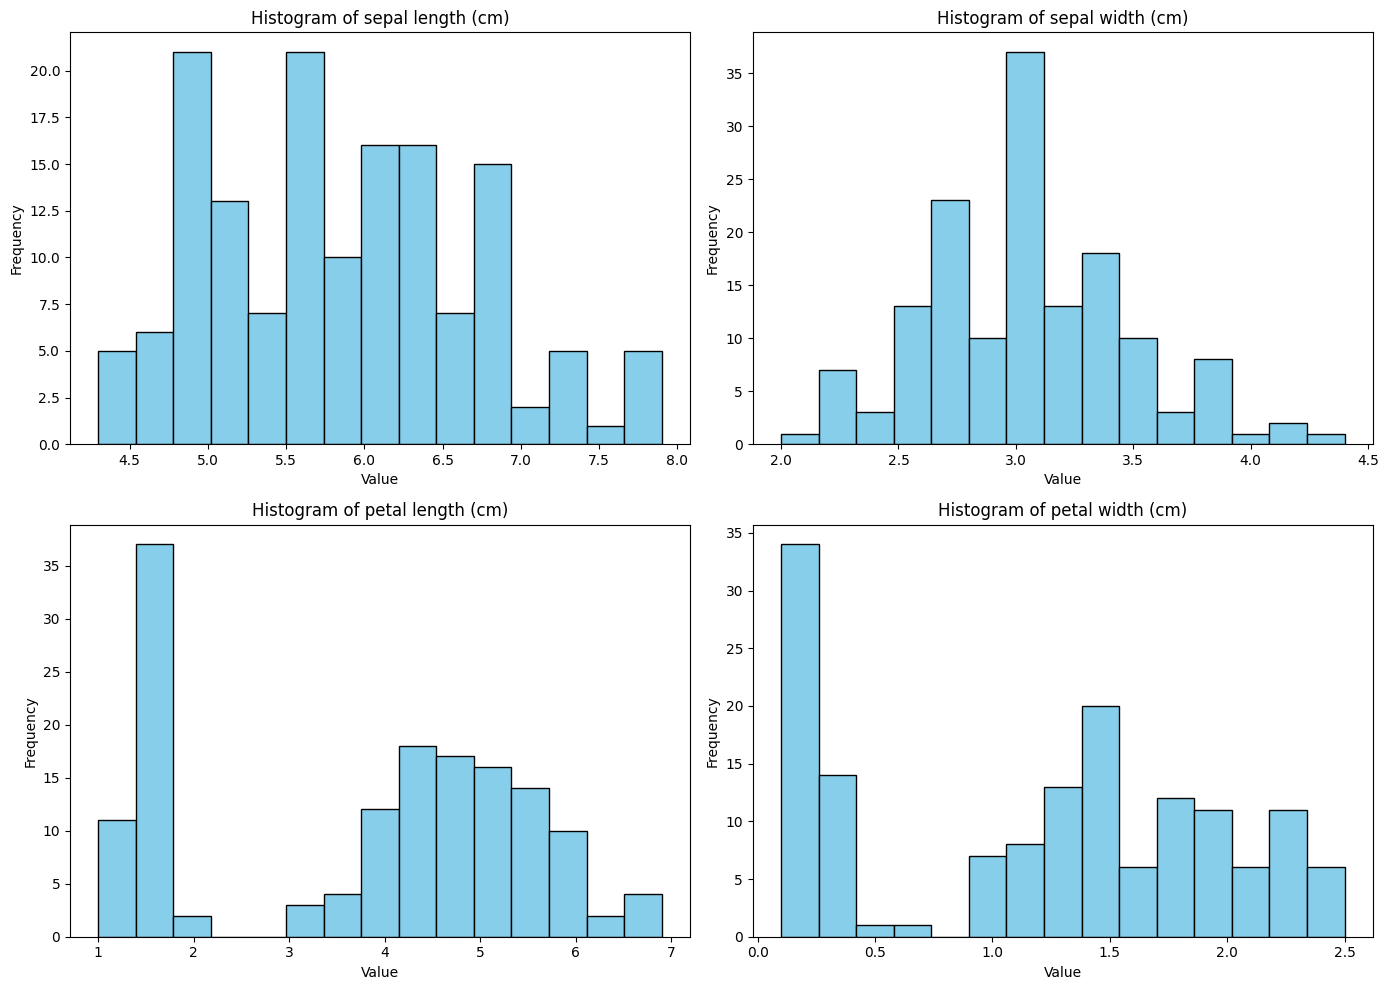

In [9]:
plt.figure(figsize=(14, 10))

# Histograms for each feature
for i in range(data.shape[1]):
    plt.subplot(2, 2, i+1)  # Use i+1 to ensure indices are within 1 to 4
    plt.hist(data[:, i], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {feature_names[i]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


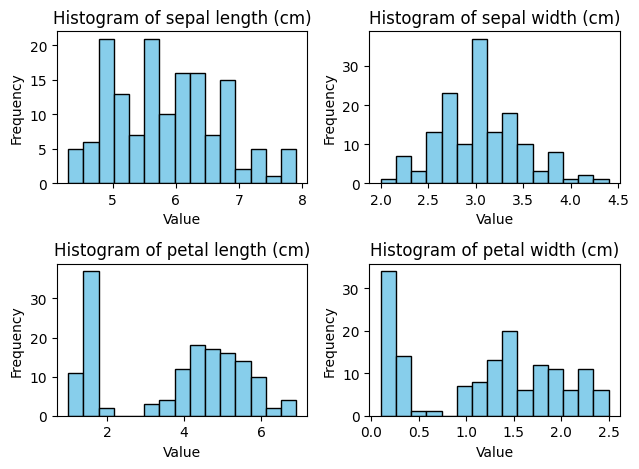

In [11]:
for i in range(data.shape[1]):
    plt.subplot(2, 2, i+1)
    plt.hist(data[:, i], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {feature_names[i]}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [12]:
correlation_matrix = np.corrcoef(data.T)
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


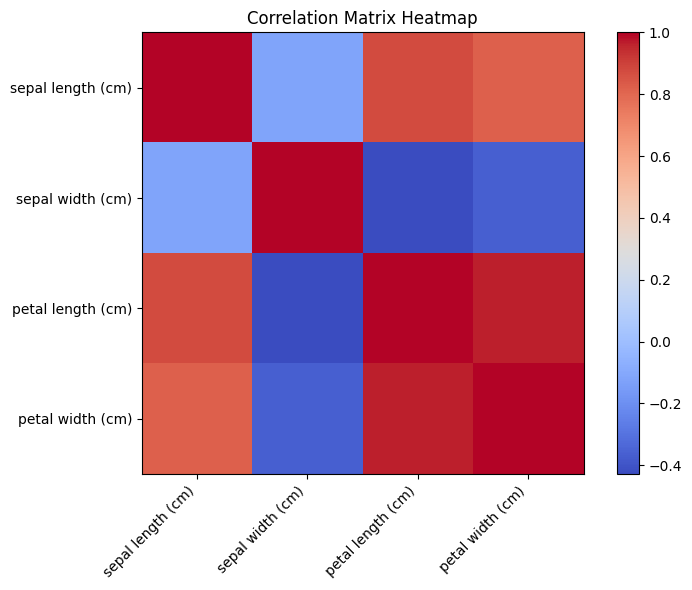

In [13]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Matrix Heatmap")
plt.xticks(range(data.shape[1]), feature_names, rotation=45, ha='right')
plt.yticks(range(data.shape[1]), feature_names)
plt.tight_layout()
plt.show()


Correlation Matrix Including Class Labels:
[[ 1.         -0.11756978  0.87175378  0.81794113  0.78256123]
 [-0.11756978  1.         -0.4284401  -0.36612593 -0.42665756]
 [ 0.87175378 -0.4284401   1.          0.96286543  0.9490347 ]
 [ 0.81794113 -0.36612593  0.96286543  1.          0.95654733]
 [ 0.78256123 -0.42665756  0.9490347   0.95654733  1.        ]]


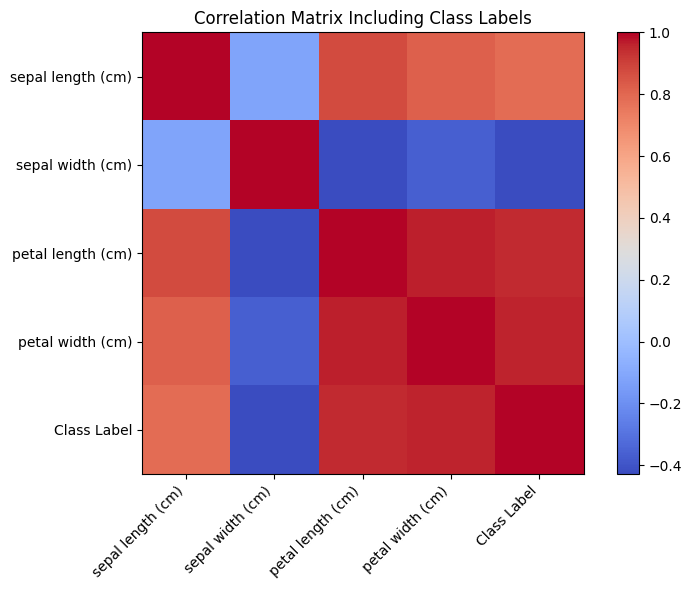

In [14]:
# Combine features with class labels
data_with_labels = np.column_stack((data, target))  # Add class labels as the last column
all_feature_names = feature_names + ["Class Label"]

# Compute the correlation matrix
correlation_matrix_with_labels = np.corrcoef(data_with_labels.T)

# Display the correlation matrix
print("\nCorrelation Matrix Including Class Labels:")
print(correlation_matrix_with_labels)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix_with_labels, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Matrix Including Class Labels")
plt.xticks(range(len(all_feature_names)), all_feature_names, rotation=45, ha='right')
plt.yticks(range(len(all_feature_names)), all_feature_names)
plt.tight_layout()
plt.show()


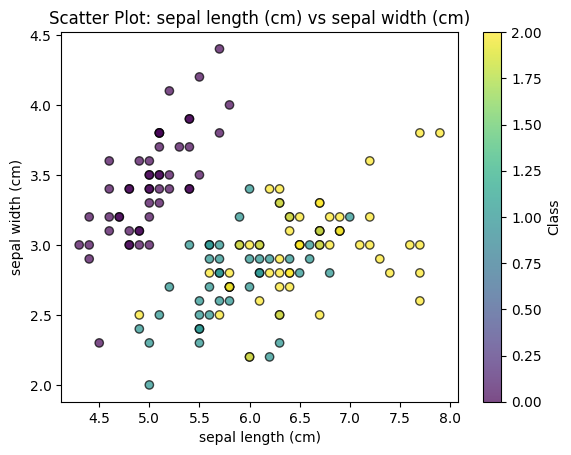

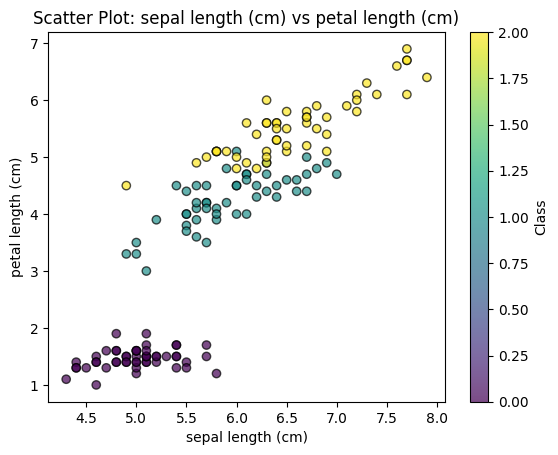

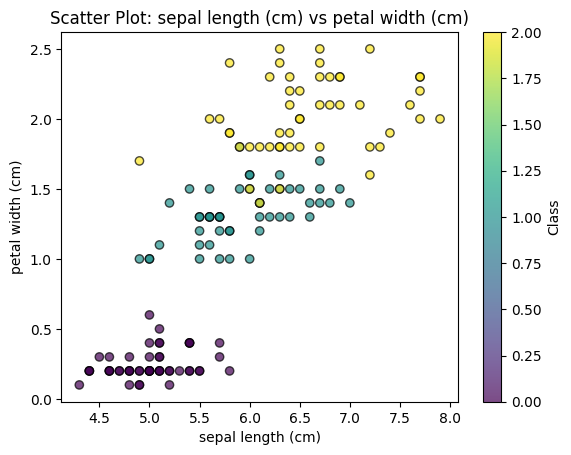

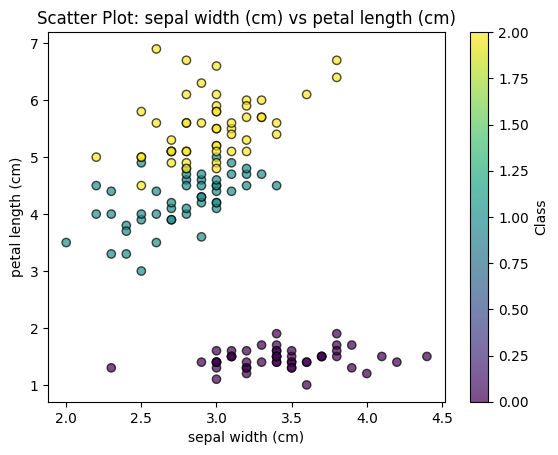

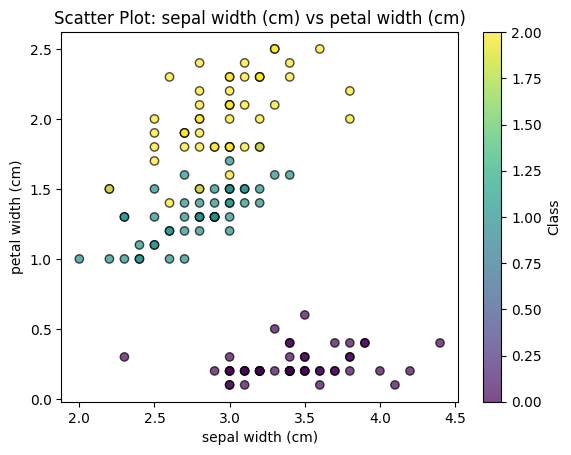

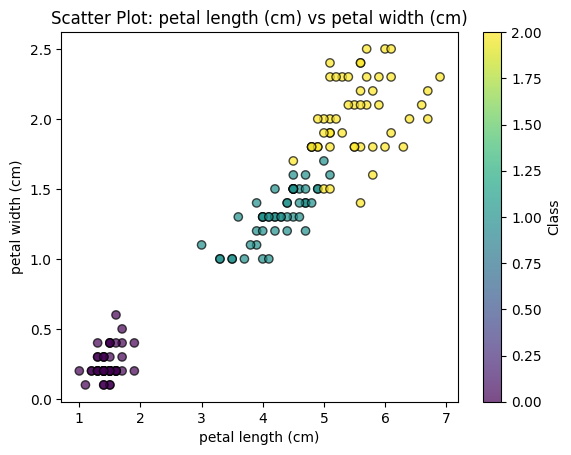

In [15]:
for i in range(data.shape[1]):
    for j in range(i+1, data.shape[1]):
        plt.scatter(data[:, i], data[:, j], c=target, cmap='viridis', edgecolor='k', alpha=0.7)
        plt.title(f"Scatter Plot: {feature_names[i]} vs {feature_names[j]}")
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.colorbar(label="Class")
        plt.show()